# data 

## data link

https://docs.google.com/spreadsheets/d/1ksDO_g2my6rY_fLHT67Dkq6r2Laql1rFoSuddqS8mV8/edit#gid=0

## Import Libraries

In [23]:
# Import Libraries for Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.cm as cm
import numpy as np


sns.set_theme(style="whitegrid")
color = sns.color_palette("Set2", 10)
sns.set_palette(palette = color)

# import os
# os.listdir()

## Load data

In [2]:
filename = 'v-mar14.xlsx'
df = pd.read_excel(filename,header=0,sheet_name='Sheet3')
df = df.fillna(0)
N = 1024 * 1024 * 1024
col = df.columns.tolist()
for c in col:
    if c!='MODEL':
        df[c] = df[c].apply(lambda x:int(x)/N)
        
df = df.round(2)

<!-- ## ReOrganize df to Create df2 for plotting the grouped barplot for model sizes. -->

In [3]:
# df_size = df[['MODEL','predict wm',
#  'predict pial',
#  'predict seg',
#  'predict stdalone']]

# df_size.set_index('MODEL')

# tmp = df_size['MODEL'].tolist()
# tmp[-1] = 'Vox2Cortex'

# S = 15 
# ax = df_size.plot(kind='barh',stacked=True,width=.8);

# # ax.set_xscale('log')
# ax.yaxis.set_visible(True)
# ax.yaxis.label.set_size(S)
# ax.xaxis.label.set_size(S)
# ax.tick_params(axis='both', which='major', labelsize=S)
# ax.set_xlabel('GPU Utilization (GB)');
# ax.set_yticklabels(tmp)
# ax.legend(fontsize = S)


# for c in ax.containers:
#     # Optional: if the segment is small or 0, customize the labels
#     labels = [v.get_width() if v.get_width() > 0 else '' for v in c]
#     modified_labels = []
#     for l in labels:
#         if l == '':
#             modified_labels.append('')
#         else:
#             modified_labels.append(str(round(float(l),2)))

#     #remove the labels parameter if it's not needed for customized labels
#     if row > 0:
#         ax.bar_label(c, labels=modified_labels, label_type='edge')
#     else:
#         ax.bar_label(c, labels=modified_labels, label_type='center', rotation=90);
#     row = 0;


# for j in range(4):
#     for i in range(6):
#         ax.containers[j][i].set_edgecolor(color[5 - i])
#         ax.containers[j][i].set_linewidth(10)
#         ax.containers[j][i].set_alpha(.8)

# Plot Load and Predict

In [4]:
cols = df.columns.tolist()[1:]
types = []
for c in cols:
    types += [c]*6

sizes = []
for c in cols:
    sizes += df[c].tolist()

models = []
models = df['MODEL'].tolist()*8


df_new = pd.DataFrame()
df_new['models'] = models
df_new['types'] = types
df_new['sizes'] = sizes

df_new['type'] = 24*['load'] + ['predict'] * 24
all_types = ['wm', 'pial', 'seg', 'stdalone']
types = []
for _ in range(2):
    for t in all_types:
        types += [t] * 6
        
df_new['types'] = types

In [5]:
# df1: load

index = df['MODEL'].tolist()
columns = ['wm', 'pial', 'seg', 'standalone']
col1 = df['load wm model'].tolist()
col2 = df['load pial model'].tolist()
col3 = df['load seg'].tolist()
col4 = df['load stdalone'].tolist()
cols = [col1,col2,col3,col4]
df1 = pd.DataFrame()
i = 0

for c in columns:
    df1[c] = cols[i]
    i += 1

df1.rename(columns={"wm": "white matter", "seg": "segmentation"}, inplace=True)
df1

,white matter,pial,segmentation,standalone
0,0.00,0.00,0.00,1.02
1,0.00,0.00,0.00,0.03
2,3.95,0.00,0.00,0.00
3,0.00,0.00,0.84,0.00
4,0.00,1.02,0.00,0.00
5,0.99,0.00,0.00,0.00


In [6]:
# df2: load

index = df['MODEL'].tolist()
columns = ['wm', 'pial', 'seg', 'standalone']
col1 = df['predict wm'].tolist()
col2 = df['predict pial'].tolist()
col3 = df['predict seg'].tolist()
col4 = df['predict stdalone'].tolist()
cols = [col1,col2,col3,col4]
df2 = pd.DataFrame()
i = 0

for c in columns:
    df2[c] = cols[i]
    i += 1

df2.rename(columns={"wm": "white matter", "seg": "segmentation"}, inplace = True)
df2

,white matter,pial,segmentation,standalone
0,0.00,0.00,0.00,0.83
1,0.00,0.00,0.00,0.13
2,1.58,0.00,0.00,0.00
3,0.98,1.14,2.49,0.00
4,0.00,1.05,0.00,0.00
5,2.11,1.88,0.00,0.00


In [7]:
def plot_clustered_stacked(dfall, labels=None,  log = False,title="",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
   

    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))
    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    axe.add_artist(l1)
    
    if log:
        axe.set_yscale('log')
    return axe

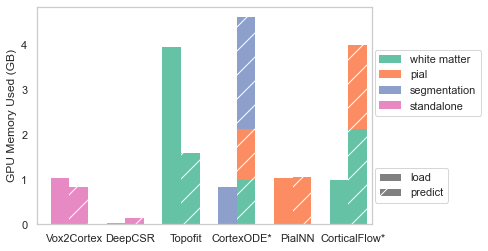

In [8]:
title = 'GPU Load Measures'

ax = plot_clustered_stacked([df1, df2],["load", "predict"])
ax.set_xticklabels(['Vox2Cortex', 'DeepCSR', 'Topofit', 'CortexODE*', 'PialNN', 'CorticalFlow*'])
ax.set_ylabel('GPU Memory Used (GB)');
plt.savefig('gpuMemoryUse.png', bbox_inches='tight', dpi=300)
plt.savefig('gpuMemoryUsed.svg', format='svg', transparent=True, bbox_inches='tight', pad_inches=0)

# Version without Stacks

In [9]:
df

,MODEL,load wm model,load pial model,load seg,load stdalone,predict wm,predict pial,predict seg,predict stdalone
0,v2c,0.00,0.00,0.00,1.02,0.00,0.00,0.00,0.83
1,DeepCSR,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.13
2,Topofit,3.95,0.00,0.00,0.00,1.58,0.00,0.00,0.00
3,CortexODE,0.00,0.00,0.84,0.00,0.98,1.14,2.49,0.00
4,PialNN,0.00,1.02,0.00,0.00,0.00,1.05,0.00,0.00
5,CorticalFlow,0.99,0.00,0.00,0.00,2.11,1.88,0.00,0.00


In [10]:
dfn = pd.DataFrame()
dfn['Model'] = ['Vox2Cortex'] * 2 + \
    ['DeepCSR'] * 2 + \
    ['Topofit'] * 2 + \
    ['CortexODE'] * 4 + \
    ['PialNN'] * 2 + \
    ['CorticalFlow'] * 3

dfn['SizeType'] = ['load multi-surface', 'predict multi-surface',
                   'load multi-surface', 'predict multi-surface',
                   'load wm model', 'predict wm model', 
                   'load segmentation', 'predict wm model', 'predict pial model', 'predict segmentation',
                   'load pial model', 'predict pial model',
                   'load wm model', 'predict wm model','predict pial model'
                  ]

dfn['Size'] = [1.02, 0.83,
               0.03, 0.13,
               3.95, 1.58,
               0.84, 0.98, 1.14, 2.49,
               1.02, 1.05,
               0.99, 2.11, 1.88]

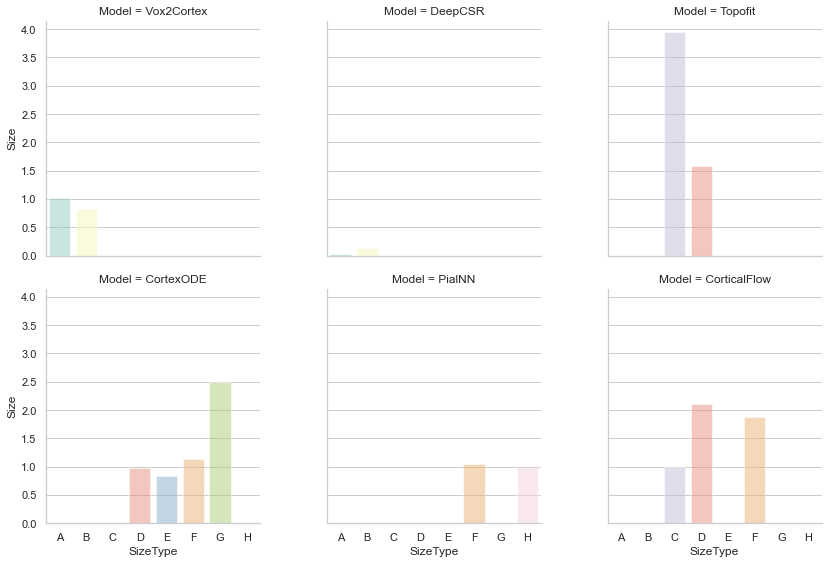

In [11]:
data = dfn
x = 'Model'
y = 'Size'
hue = 'SizeType'

# Draw a nested barplot by species and sex
g = sns.catplot(data=data, kind="bar",x=hue, y=y,col=x,col_wrap=3,
  palette="Set3", alpha=.5, height=4,sharex=True, dodge=True
)
plt.tight_layout()
g.set_xticklabels(['A','B','C','D','E','F','G','H'])
# g = sns.catplot(kind='bar', data=df , x=x, y=y,
#                 hue=hue, palette='rocket', dodge=False, sharex=False)
# plt.tight_layout()
# plt.show()



# sns.move_legend (g, "upper right")
# g.despine(left=True);

# g.set_axis_labels("", "Body mass (g)")
# plt.savefig('gpuMemoryUse2.png', bbox_inches='tight', dpi=300)
# plt.savefig('gpuMemoryUsed2.svg', format='svg', transparent=True, bbox_inches='tight', pad_inches=0)

## another version

In [12]:
S = 25
sns.set_theme(style="whitegrid")
color = sns.color_palette("Set3", 25)
sns.set_palette(palette = color)

color = sns.color_palette("Paired")

font = {
        'size'   : 40}

plt.rc('font', **font)
plt.rcParams.update({'font.size': 40})

In [13]:
dfn.sort_values(by=['Model'], inplace = True)

In [14]:
dfn.reset_index(drop=True,inplace=True)

In [15]:
dfn['SizeType'] = dfn['SizeType'].apply(lambda x:x.capitalize())

In [16]:
data

,Model,SizeType,Size
0,CortexODE,Load segmentation,0.84
1,CortexODE,Predict wm model,0.98
2,CortexODE,Predict pial model,1.14
3,CortexODE,Predict segmentation,2.49
4,CorticalFlow,Load wm model,0.99
5,CorticalFlow,Predict wm model,2.11
6,CorticalFlow,Predict pial model,1.88
7,DeepCSR,Load multi-surface,0.03
8,DeepCSR,Predict multi-surface,0.13
9,PialNN,Load pial model,1.02


In [17]:
dfn

,Model,SizeType,Size
0,CortexODE,Load segmentation,0.84
1,CortexODE,Predict wm model,0.98
2,CortexODE,Predict pial model,1.14
3,CortexODE,Predict segmentation,2.49
4,CorticalFlow,Load wm model,0.99
5,CorticalFlow,Predict wm model,2.11
6,CorticalFlow,Predict pial model,1.88
7,DeepCSR,Load multi-surface,0.03
8,DeepCSR,Predict multi-surface,0.13
9,PialNN,Load pial model,1.02


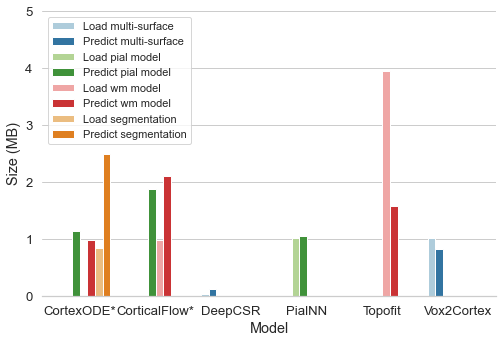

In [18]:
data = dfn
x = 'Model'
y = 'Size'
hue = 'SizeType'
hue_order = ['Load multi-surface','Predict multi-surface', 
             'Load pial model','Predict pial model',
             'Load wm model', 'Predict wm model',
             'Load segmentation','Predict segmentation',
            ]
# Draw a nested barplot by species and sex
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
g = sns.catplot(data=data, kind="bar",x=x, hue=hue,y=y,
  palette=color, aspect = 1, alpha=1, height=5,sharex=False, hue_order=hue_order
)
g._legend.remove()
plt.ylim(0,5)
plt.tight_layout()
g.despine(left=True)
plt.legend(loc='upper left',fontsize=11)
g.set_titles()
# g.set_ylabels("Size")
g.set_xticklabels([ 'CortexODE*','CorticalFlow*', 'DeepCSR', 'PialNN','Topofit','Vox2Cortex'
       ]);
plt.ylabel('Size (MB)')

# 

plt.savefig('gpuMemoryUsed.png', dpi=300)
plt.savefig('gpuMemoryUsed.svg', format='svg', transparent=True, bbox_inches='tight', pad_inches=0)

# Manually Add Bars

In [20]:
list(dfn.Model.unique())

['CortexODE', 'CorticalFlow', 'DeepCSR', 'PialNN', 'Topofit', 'Vox2Cortex']

In [24]:
color = sns.color_palette("Set2", 10)
color

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]

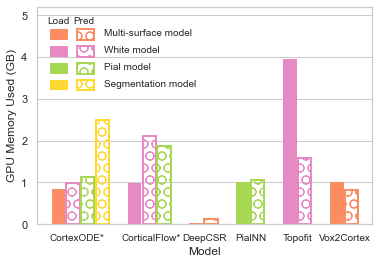

In [49]:
S = 10
plt.rcParams.update({'font.size': S,'xtick.labelsize':S, 'axes.titlesize':S})
plt.rcParams["font.family"] = "sans-serif"
# title = 'Time and Memory Measures for Surface Generation'
fig, axs = plt.subplots(nrows = 1, ncols=1)
from matplotlib.patches import Rectangle


hs = list(dfn.Size)

lw = 2
ec = 'none'
fc = 'blue'
w = .2
h = hs[0]
x = 0




# Add colors
colors = [color[1],color[3],color[4],color[5]]
fc = colors[:4]

fc2 = colors

# tmp = []
# for c in fc:
#     tmp.append([min(i+.3, 1) for i in c])

# fc2 = []
# for c in fc:
#     fc2.append([max(i-.4, 0.01) for i in c])
    
# fc = tmp
# fc2[-1] = [0.3, 0.14117647058823524, 0.3647058823529411]



# Get colors for Models
idx = 0
ha = 'O'
ratio = 1.1
fcs = [fc[0],fc2[1],fc2[2],fc2[3]]
fc_cf = [fc[1],fc2[1],fc2[2]]
fc_d = [fc[0],fc2[0]]
fc_p = [fc[2],fc2[2]]
fc_t = [fc[1],fc2[1]]
fc_v = [fc[0],fc2[0]]

flag = True
for idx in range(4):
    x += w*ratio
    h = hs[idx]
    if flag:
        plt.gca().add_patch(Rectangle((x,0),height=h,width=w,linewidth=1,edgecolor=ec,facecolor=fcs[idx]))
        flag = False
    else:
        plt.gca().add_patch(Rectangle((x,0),height=h,width=w,linewidth=lw,hatch=ha,edgecolor=fcs[idx],fill=False))

x += w*1.3
fcs = fc_cf
flag = True
for idx in range(4, 4+3):
    x += w*ratio
    h = hs[idx]
    if flag:
        plt.gca().add_patch(Rectangle((x,0),height=h,width=w,linewidth=1,edgecolor=ec,facecolor=fcs[idx-4]))
        flag = False
    else:
        plt.gca().add_patch(Rectangle((x,0),height=h,width=w,linewidth=lw,hatch=ha,edgecolor=fcs[idx-4],fill=False))
        
fcs = fc_d
x += w*1.3

flag = True
for idx in range(7, 7+2):
    x += w*ratio
    h = hs[idx]
    if flag:
        plt.gca().add_patch(Rectangle((x,0),height=h,width=w,linewidth=1,edgecolor=ec,facecolor=fcs[idx-7]))
        flag = False
    else:
        plt.gca().add_patch(Rectangle((x,0),height=h,width=w,linewidth=lw,hatch=ha,edgecolor=fcs[idx-7],fill=False))
    
fcs = fc_p
x += w*1.3
flag = True
for idx in range(9, 9+2):
    x += w*ratio
    h = hs[idx]
    if flag:
        plt.gca().add_patch(Rectangle((x,0),height=h,width=w,linewidth=1,edgecolor=ec,facecolor=fcs[idx-9]))
        flag = False
    else:
        plt.gca().add_patch(Rectangle((x,0),height=h,width=w,linewidth=lw,hatch=ha,edgecolor=fcs[idx-9], fill = False))

x += w*1.3
fcs = fc_t
flag = True
for idx in range(11, 11+2):
    x += w*ratio
    h = hs[idx]
    if flag:
        plt.gca().add_patch(Rectangle((x,0),height=h,width=w,linewidth=1,edgecolor=ec,facecolor=fcs[idx-11]))
        flag = False
    else:
        plt.gca().add_patch(Rectangle((x,0),height=h,width=w,linewidth=lw,hatch=ha,edgecolor=fcs[idx-11],fill = False))
cnt = idx + 1
x += w*1.3

fcs = fc_v
flag = True
for idx in range(13, 15):
    x += w*ratio
    h = hs[idx]
    if flag:
        plt.gca().add_patch(Rectangle((x,0),height=h,width=w,linewidth=1,edgecolor=ec,facecolor=fcs[idx-13]))
        flag = False
    else:
        plt.gca().add_patch(Rectangle((x,0),height=h,width=w,linewidth=lw,hatch=ha,edgecolor=fcs[idx-13],fill=False))
# add legend

sx, sy = .2, 4.4
texty = 4.8
axs.text(sx-.05, texty, 'Load', fontsize=S)

plt.gca().add_patch(Rectangle((sx,sy),height=w*1.3,width=w*1.3,linewidth=1,edgecolor=ec,facecolor=fc[0]))

sx += w*2
axs.text(sx-.05, texty, 'Pred', fontsize=S)
plt.gca().add_patch(Rectangle((sx,sy),height=w*1.3,width=w*1.3,linewidth=lw,hatch=ha,fill=False,edgecolor=fc2[0]))

modelnames = ['Multi-surface model','White model','Pial model','Segmentation model'] 
axs.text(sx + w*2, sy+.1, modelnames[0], fontsize=S)

delta = .4
for i in range(3):
    sy -= .4
    sx = .2
    plt.gca().add_patch(Rectangle((sx,sy),height=w*1.3,width=w*1.3,linewidth=1,edgecolor=ec,facecolor=fc[i+1]))
    
    sx += w*2
    plt.gca().add_patch(Rectangle((sx,sy),height=w*1.3,width=w*1.3,linewidth=lw,hatch=ha,fill=False,edgecolor=fc2[i+1]))
    axs.text(sx + w*2, sy+.1, modelnames[i+1], fontsize=S)
    
plt.xlim(0,5)
plt.ylim(0,5.2)

# add labels
locs = [.2,1.3, 2.1, 2.8, 3.5,4.2]
locs = [i+.4 for i in locs]
labels = ['CortexODE*', 'CorticalFlow*', 'DeepCSR', 'PialNN', 'Topofit', 'Vox2Cortex']
plt.xticks(locs,labels);

# remove grid line
plt.grid(axis='x')

plt.xlabel('Model')
plt.ylabel('GPU Memory Used (GB)');
plt.savefig('MemoryUsedPlot.png', dpi=200)
plt.savefig('gpuMemoryUsed.svg', format='svg', transparent=True, bbox_inches='tight', pad_inches=0)

# Ref

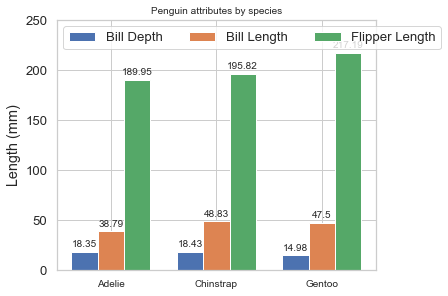

In [203]:
species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncol=3)
ax.set_ylim(0, 250)

plt.show()